In [1]:
import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.build import graphene
from ase.io import write

(examples:pacbed_quickstart)=
# PACBED quickstart

This notebook demonstrates a basic simulation of a position averaged convergent beam electron diffraction (PACBED) simulation of SrTiO$_3$.

## Configuration

We start by (optionally) setting our configuration. See [documentation](reference:configuration) for details.

In [3]:
abtem.config.set(
    {
        "device": "cpu",
        "fft": "fftw",
        "diagnostics.task_progress": True,
        "diagnostics.progress_bar": "tqdm",
    }
);

## Atomic model
We import a model of SrTiO<sub>3</sub>. See our [walkthough](walkthrough:atomic_models) or our [tutorial](tutorials:advanced_atomic_models) on atomic models. 

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

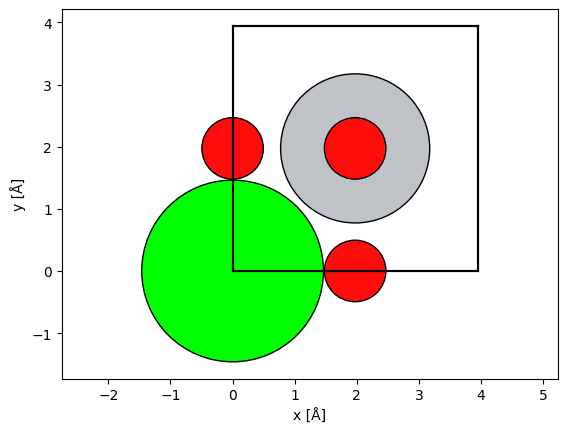

In [4]:
atoms = ase.io.read("data/SrTiO3.cif")

abtem.show_atoms(atoms)

## Crystal potential

In [5]:
potential_unit = abtem.Potential(atoms, slice_thickness=0.5, sampling=0.05)

In [6]:
repetitions_xy = 5
repetitions_z = 10

potential = abtem.CrystalPotential(
    potential_unit, repetitions=(repetitions_xy, repetitions_xy, repetitions_z)
)

## Probe

In [7]:
probe = abtem.Probe(energy=100e3, semiangle_cutoff=30)

probe.grid.match(potential)

## Scan

In [8]:
scan = abtem.GridScan(start=(0, 0), end=(repetitions_xy, repetitions_xy))

tasks:   0%|          | 0/2 [00:00<?, ?it/s]

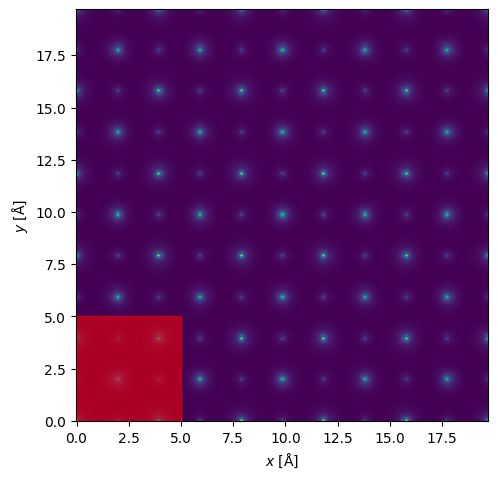

In [9]:
visualization = potential.show()

scan.add_to_plot(visualization)

## Detect

In [10]:
detector = abtem.PixelatedDetector()

In [11]:
measurement = probe.scan(scan=scan, potential=potential, detectors=detector)

In [13]:
measurement.compute();

## Average over scan positions

In [14]:
measurement.shape

(17, 17, 185, 185)

In [16]:
measurement.axes_metadata

type                 label     coordinates
-------------------  --------  --------------------
ScanAxis             x [Å]     0.00 0.29 ... 4.71
ScanAxis             y [Å]     0.00 0.29 ... 4.71
ReciprocalSpaceAxis  kx [1/Å]  -4.66 -4.61 ... 4.66
ReciprocalSpaceAxis  ky [1/Å]  -4.66 -4.61 ... 4.66

In [17]:
pacbed = measurement.mean(axis=(0,1))

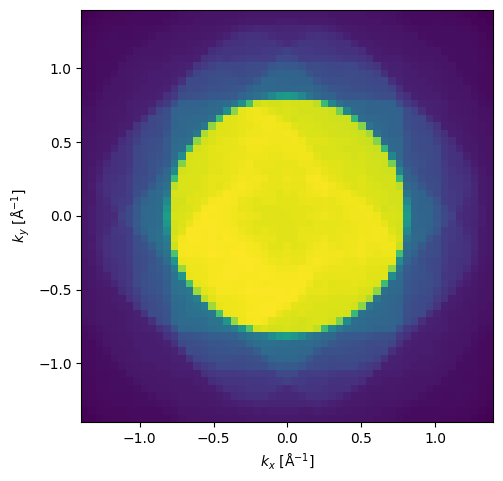

In [23]:
pacbed.crop(50).show(power=0.5);

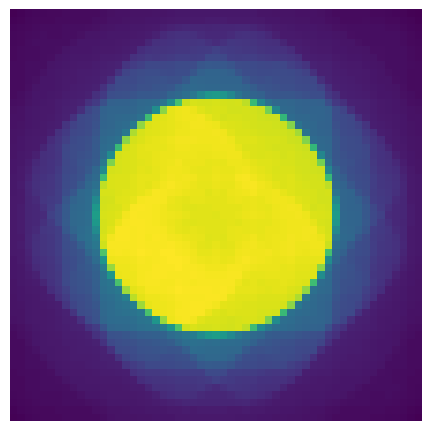

In [24]:
# this cell produces a thumbnail for the online documentation

visualization = pacbed.crop(50).show(power=0.5)
visualization.axis_off()
plt.savefig(
    "../thumbnails/pacbed_quickstart.png", bbox_inches="tight", pad_inches=0
)